# Artificial Intelligence
## UEMH3073 / UECS2053 / UECS2153

# Lab 2: Genetic Algorithm

This notebook is an assignment requiring you to investigate the Travelling Salesman Problem. Guidance is provided so you can understand what needs to be done for this assignment as you follow through this lab. Convenience classes and functions/ methods are provided.

You will encounter #TODO in the code cells explaining tasks you need to complete. In other words, you will need to write codes and accomplish the #TODO tasks so that the genetic algorithm functions well and runs correctly. Look for "Replacement starts here" and "Replacement ends here" to know the parts of the codes requiring your inputs.
    

The #TODO tasks and their marks distribution are as follows:
 
a. #TODO1 (10 marks) in the Population Initialization function. You will read a set of cities from the filename when creating an initial population. 

b. #TODO2 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Tournament Selection. 

c. #TODO3 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Proportional Selection.

d. #TODO4 (10 marks) in the Survival Selection function. You will replace the dummy survival selection function with Merge, Sort & Truncate. 
    
e. #TODO5 (10 marks) in the Crossover function. You will replace the dummy crossover function the Partially Mapped Crossover approach.

f. #TODO6 (10 marks) in the Mutation function. You will replace the dummy mutation function with Insertion Mutation approach. 

g. #TODO7 (10 marks) in Performance Evaluation. You will present performance evaluation for the different Parent Selection functions. 

Marks are also given for: Report Presentation and Formatting (15%) and Code Quality and Comments (15%). More details about this notebook and assignemnt are provided in your lab sheet.

## An Overview of the Travelling Salesman Problem

In the travelling salesman problem, a salesperson wish to find the shortest path that passes through all cities s/he wishes to visit given the coordinates of a set of cities. The salesperson should visit each of the cities once only, and so:

a. Each path consists all cities in the set.

b. Each path visits each of the cities once only. So, none of the cities are visited more than once. 

## Imports

In [122]:
%matplotlib inline

# Please add more imports if you need them 

import random
import time
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint as print 

## Convenience Classes

### City

The City class, which represents a city, possesses the properties of the city and has functions/ methods used for calculating the distance between the city and another city. Each path, represented by a chromosome, is formed by a set of cities.   

In [123]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, city):
        xDis = abs(self.x - city.x)                         # xDis = |x-x1|
        yDis = abs(self.y - city.y)                         # yDis = |y-y1|
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))       # distance  = (xDis^2 + yDis^2)^0.5
        return distance
    
    def __repr__(self):                                     # define string representation
        return "(" + str(self.x) + "," + str(self.y) + ")"  # return the value of (x,y)

### Fitness

The Fitness class, which represents the fitness function, possesses the properties of a path and has functions/methods used for calculating the fitness value of the path, which is based on the distance of the path. 

In [124]:
class Fitness: 
    def __init__(self, route):                
        self.route = route  
        self.distance = None # set the initial value to none
        self.fitness = None
    
    def routeDistance(self):                                # calculating route distance
        if self.distance == None:                           # if total distance of route has not been calculated
            pathDistance = 0.0                              # initialize the path distance = 0
            for i in range(0, len(self.route)):             # loop from route 0 to route (desired) 
                fromCity = self.route[i]                    # current city 
                toCity = None                               # clear the definition of toCity（initialize as None)
                if i+1 < len(self.route):                   # check if there is remianing city 
                    toCity = self.route[i+1]
                else:
                    toCity = self.route[0]                  # set toCity as last city
                pathDistance += fromCity.distance(toCity)   # add the distance from the first city to the last city
            self.distance = pathDistance                    # return the result to self.distance
        return self.distance
    
    def routeFitness(self):                                            # calculating route fitness 
        if self.fitness == None:
        # Fitness function (Simple division) that uses a simple 
        # division that divides one by the distance of the path
            self.fitness = 1 / float(self.routeDistance())             # 1/pathDistance (fitness) , ensure pathDistance is not equal to 110
            # Note: You must ensure a division by zero does not occur 
        return self.fitness

## Population Initialization  

The population initialization function (or method) performs random initialization. This creates an initial population with completely random chromosomes (or solutions). There are three functions related to population initialization. 

The first function is genCityList() which generates a set of cities from a file.  

In [125]:
def genCityList(filename):                                          # generate a list of cities
    cityList = []
    
    # TODO 1 (10 marks) - Replace the following codes that generate 10 random cities.
    # Your new implementation must read a set of cities from the filename to be used for creating 
    # an initial population.  
    
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors with slight effects on the fitness value.
    # >0 to <5 marks: Major errors with significant effects on the fitness value. 
    # 0 marks:        No answer is given. 
    
    try:
        with open(filename, 'r') as file:                           # open file in read mode
            lines = file.readlines() 
            for line in lines[1:]:                                  # skip the first line of the lists in the file
                part = line.strip().split(',')                      # removes leading whitespace from the line and split the data by commas
                x,y = int(part[1]),int(part[2])                     # ensure the value of coordinates are all integers
                cityList.append(City(x, y)) 
    except Exception as e:
        print(f"Error reading file: {e}")                           # the program will show error when the file cannot be loaded
    
    return cityList                                                 # assign the value to the cityList and return the values


The second function is createdRoute() which generates a random route (chromosome) from a set of City Instances.

In [126]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList)) # randomly locate different cities location in the array
    return route

The third function is initialPopulation() which calls the second function repeatedly to create an initial population (a list of routes).

In [127]:
def initialPopulation(popSize, cityList):         # popsize indicates the size of population, cityList is the list of cities
    population = []                               # store the generated route
    for i in range(0, popSize):                   # loop that iterates 'popSize' times
        population.append(createRoute(cityList))  # put the randomized city list into the population[i]
    return population

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code.

Sample run 1 initializes 10 cities in cityList as follows:

cityList = genCityList('cities10.txt') 
print(cityList)

Sample run 2 initializes 10 cities in cityList and creates a population with three routes as follows:

cityList = genCityList('cities10.txt') 
population = initialPopulation(3, cityList) 
print(population)

In [128]:
# Test code for TODO 1
cityList = genCityList('cities50.txt')    
population = initialPopulation(100,cityList)    # generate 100 population of different random arrangement of 50 cities
population[0] # show the first population 

[(7,26),
 (97,66),
 (28,98),
 (10,31),
 (44,29),
 (80,68),
 (84,43),
 (6,11),
 (36,1),
 (15,34),
 (95,97),
 (78,28),
 (29,58),
 (26,39),
 (61,21),
 (76,88),
 (69,80),
 (57,30),
 (70,32),
 (77,16),
 (79,36),
 (57,57),
 (94,70),
 (44,66),
 (40,64),
 (59,3),
 (52,35),
 (75,44),
 (15,46),
 (56,77),
 (92,75),
 (34,83),
 (39,40),
 (14,74),
 (89,52),
 (100,64),
 (92,57),
 (33,60),
 (12,18),
 (35,46),
 (48,32),
 (98,61),
 (76,63),
 (1,77),
 (78,60),
 (95,51),
 (9,23),
 (45,86),
 (20,91),
 (10,34)]

## Selection

Parents selection selects chromosomes with high fitness values from a population. Survivor selection selects chromosomes with higher fitness values to form the population of the next generation. The population size is len(population), so we have len(population) in this population. 

### Parent Selection

There are three implementations for parent selection. The first parentSelection() performs random selection.

In [129]:
def parentSelection_random(population, poolSize=None):               # select parents from the population for mating pool
    if poolSize == None:                                      # check if the poolSize is none
        poolSize = len(population)                            # set poolSize to the size of population
        
    matingPool = []                                           # an empty list store the selected parents

    for i in range(0, poolSize):                              
        fitness = Fitness(population[i]).routeFitness()       # calculate the fitness of the individual
        matingPool.append(random.choice(population))          # randomly selects an individual from the population
      
    return matingPool                                         # the individual is stored in matingPool

The second parentSelection() performs Tournament Selection.

In [130]:
def parentSelection_tournament(population, parent_size=2, tournament_size=3, poolSize=None):
    # Defines the function with parameters for the population, and an optional pool size.
    
    
    # TODO 2 (10 marks) - Replace the dummy parent selection function below with  
    # Tournament Selection.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    # You will need to compare the performance achieved by Random Selection, 
    # Tournament Selection, and Proportional Selection during performance evaluation 
    # later. So, you will run either Random Selection, Tournament Selection, or 
    # Proportional Selection in a simulation run.
    
   if poolSize == None:
        poolSize = len(population)                             # set poolSize to the length of population if poolSize not given
    
    # Replacement starts here
   iteration = 0
   matingPool = []                                            # initialize empty list
    
   while (iteration < parent_size):                           # if the iteration is lesser than parent size 
      bestFitness = 0              
      Pool = random.sample(population[0:poolSize],tournament_size)          # Randomly selects a set of individuals(tournament_size)from the population.
      for i in range (len(Pool)):
          fitness = Fitness(Pool[i]).routeFitness()           # calculate the fitness of the individual
          print(fitness)
          if fitness > bestFitness:                           # if fitness value greater than bestFitness, update the bestFitness to fitness
             bestFitness = fitness
             print("Best Fitness Score is:{}".format(bestFitness))
             bestPopulation = population[i]
      matingPool.append(bestPopulation)                       # locate the best individual from the tournament to the mating pool  
      iteration += 1
      __builtins__.print()
        
    
    # Replacement ends here
    
   return matingPool

In [131]:
# Test code for TODO 2
cityList = genCityList('cities50.txt')    
population = initialPopulation(100,cityList)
parentSelection_tournament(population,2,3)


0.0004487174390625189
'Best Fitness Score is:0.0004487174390625189'
0.0003943598077547593
0.00043537424341193393

0.00042159344102881443
'Best Fitness Score is:0.00042159344102881443'
0.0004179372284193384
0.0003715113345616552



[[(34,83),
  (70,32),
  (10,31),
  (1,77),
  (12,18),
  (33,60),
  (44,29),
  (76,63),
  (28,98),
  (78,28),
  (94,70),
  (78,60),
  (44,66),
  (20,91),
  (56,77),
  (76,88),
  (39,40),
  (35,46),
  (6,11),
  (29,58),
  (84,43),
  (92,57),
  (92,75),
  (89,52),
  (57,30),
  (61,21),
  (9,23),
  (26,39),
  (10,34),
  (15,46),
  (48,32),
  (14,74),
  (15,34),
  (75,44),
  (57,57),
  (95,97),
  (77,16),
  (69,80),
  (52,35),
  (100,64),
  (40,64),
  (7,26),
  (95,51),
  (59,3),
  (45,86),
  (80,68),
  (97,66),
  (36,1),
  (79,36),
  (98,61)],
 [(34,83),
  (70,32),
  (10,31),
  (1,77),
  (12,18),
  (33,60),
  (44,29),
  (76,63),
  (28,98),
  (78,28),
  (94,70),
  (78,60),
  (44,66),
  (20,91),
  (56,77),
  (76,88),
  (39,40),
  (35,46),
  (6,11),
  (29,58),
  (84,43),
  (92,57),
  (92,75),
  (89,52),
  (57,30),
  (61,21),
  (9,23),
  (26,39),
  (10,34),
  (15,46),
  (48,32),
  (14,74),
  (15,34),
  (75,44),
  (57,57),
  (95,97),
  (77,16),
  (69,80),
  (52,35),
  (100,64),
  (40,64),
  (7,

The third parentSelection() performs Proportional Selection.

In [132]:
def parentSelection_proportional(population, parent_size=2, poolSize=None):

    # TODO 3 (10 marks) - Replace the dummy parent selection function below with  
    # Proportional Selection.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    # You will need to compare the performance achieved by Random Selection, 
    # Tournament Selection, and Proportional Selection during performance evaluation 
    # later. So, you will run either Random Selection, Tournament Selection, or 
    # Proportional Selection in a simulation run.
    
    if poolSize == None:
         poolSize = len(population)
        
    matingPool = []

    # Replacement starts here
    totalFitnessScore = 0
    score = []
    relativeFitnessScore = []
    cumulativeScore = []
    currentScore = 0
    iteration = 0
    escape = False
    
    totalFitnessScore = sum([Fitness(p).routeFitness() for p in population[:poolSize]]) # sum all the fitness score of populations
    score = ([Fitness(p).routeFitness() for p in population[:poolSize]])   # store the fitness score of each population in the list 
    
    for i in range(len(score)):
       relativeFitnessScore.append(score[i]/totalFitnessScore)             # calculate each relative fitness score by dividing the total fitness score

    for i in range(len(score)):
       currentScore += relativeFitnessScore[i]                             # calculate the cumulative score by adding up its relative fitness score as iteration goes 
       cumulativeScore.append(currentScore)                                # record each cumulative score of each loop at different index of population
        
    while(iteration < parent_size):
        randomNumber = random.random()   # produce a random number between 0 to 1       # produce a random number for selection
        __builtins__.print("random number: ",randomNumber)

        for i in range (len(cumulativeScore)):                                          
             if randomNumber <= cumulativeScore[0]:                                     # if the random number lesser than the first cumulative score
                 __builtins__.print("population_location[i]: ",i)              
                 __builtins__.print("cumulative score[0]: ", cumulativeScore[i])
                 __builtins__.print()
                 matingPool.append(population[0])                                       # then select the first population as our parent
                 break
                          
             if cumulativeScore[i] < randomNumber <= cumulativeScore[i+1]:              # if the random number in between somewhere of first and second cumulative score
                 __builtins__.print("population_location[i+1]: ",i+1)                   # it will select the second population
                 __builtins__.print("cumulative score[i]: ", cumulativeScore[i],",","cumulative score[i+1]: ",cumulativeScore[i+1])
                 __builtins__.print()
                 matingPool.append(population[i+1])
                 break
                               
        iteration += 1                        # iteration adds up after selecting a parent (monitor the number of parent selected)
              
    # Replacement ends here
    
    return matingPool,totalFitnessScore

In [133]:
# Test code for TODO 3
cityList = genCityList('cities50.txt')    
population = initialPopulation(100,cityList)
parent,score = parentSelection_proportional(population,2)
parent,score

random number:  0.7534198936000778
population_location[i+1]:  76
cumulative score[i]:  0.751869030134588 , cumulative score[i+1]:  0.7623889779644684

random number:  0.8879775859451868
population_location[i+1]:  89
cumulative score[i]:  0.8863320256844739 , cumulative score[i+1]:  0.8964289510467083



([[(15,46),
   (94,70),
   (78,28),
   (76,63),
   (6,11),
   (26,39),
   (80,68),
   (92,75),
   (59,3),
   (35,46),
   (7,26),
   (52,35),
   (57,30),
   (84,43),
   (98,61),
   (56,77),
   (70,32),
   (75,44),
   (14,74),
   (34,83),
   (92,57),
   (77,16),
   (39,40),
   (40,64),
   (10,31),
   (36,1),
   (79,36),
   (10,34),
   (48,32),
   (89,52),
   (15,34),
   (44,29),
   (76,88),
   (28,98),
   (97,66),
   (1,77),
   (33,60),
   (61,21),
   (29,58),
   (95,51),
   (57,57),
   (44,66),
   (95,97),
   (45,86),
   (12,18),
   (78,60),
   (100,64),
   (69,80),
   (20,91),
   (9,23)],
  [(10,31),
   (95,97),
   (70,32),
   (80,68),
   (36,1),
   (94,70),
   (84,43),
   (6,11),
   (57,30),
   (92,75),
   (92,57),
   (78,28),
   (35,46),
   (15,34),
   (34,83),
   (12,18),
   (14,74),
   (98,61),
   (10,34),
   (26,39),
   (76,63),
   (79,36),
   (1,77),
   (97,66),
   (59,3),
   (52,35),
   (57,57),
   (61,21),
   (29,58),
   (69,80),
   (40,64),
   (89,52),
   (45,86),
   (44,66),


### Survival Selection

In [134]:
def survivorSelection(population, eliteSize):
    
    # TODO 4 (10 marks) - Replace the dummy survival selection function below with  
    # Merge, Sort & Truncate. (merge old and new, sort with fitness score and truncate)
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    elites = []
    elites_scores = []
    # Replacement starts here
    # Process elite list
    def form_correction(elites):
        return [chromosome for chromosome in elites[0]]   # to remove the additional bracket dimension

    # Reduce population to elite size
    def cut_down(eliteSize):
        elites.append(population[:eliteSize])            # to limit the population only up to elite group size

    # Assign fitness to chromosome as its last element
    def addFitness():
        for chromosome in population:                    # calculate each population score and append at the last column of each row of the population
            score = Fitness(chromosome).routeFitness()
            chromosome.append(score)
            
    # Remove fitness
    def removeFitness():
        for chromosome in population:             # delete the fitness value at the last column in each row
            chromosome.pop()

    # Sort population according to fitness
    def mergeSort(population):                       # split the populations into half, so that the data is split into two parts (left, right)
        if len(population) <= 1:                     # so compare the total fitness score 
            return population

        mid_p = len(population) // 2  
        left = mergeSort(population[:mid_p])         # split into the left part
        right = mergeSort(population[mid_p:])        # split into the right part
    
        sorted_population = []
        i = j = 0

        while i < len(left) and j < len(right):    
            if left[i][-1] > right[j][-1]:
                sorted_population.append(left[i])     # if the leftside fitness value larger than right, add leftside population first
                i += 1
            else:
                sorted_population.append(right[j])    # else the rightside is more larger
                j += 1

        sorted_population.extend(left[i:])            # add any remaining of elements from leftside
        sorted_population.extend(right[j:])           # add any remaining of elements from rightside
        return sorted_population

    def score(elites):
        elites_scores = ([Fitness(e).routeFitness() for e in elites])
        return elites_scores

        
    # Main Program for survival selection
    addFitness()
    population = mergeSort(population)
    removeFitness()
    cut_down(eliteSize)
    elites = form_correction(elites)
    score = score(elites)
    # Replacement ends here
        
    return elites,score

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code. 

Sample run 1 initializes 10 cities in cityList, creates a population with four routes, and creates a pool of parents as follows:

population = initialPopulation(4, genCityList('cities50.txt'))
matingpool = parentSelection(population, 4) 
print('Initial population') 
print(len(population)) 
print('Mating pool') 
print(len(matingpool))

Sample run 2 initializes 10 cities in cityList, creates a population with four routes, select an elite chromosome as follows:

In [135]:
# Test code for TODO 4
cityList = genCityList('cities50.txt')    
population = initialPopulation(100,cityList)    # generate 100 population of different random arrangement of 50 cities
elites,scores = survivorSelection(population, 5)       # select for 5 number of elites
print('Initial population')
print(len(population))
print('Selected elites')
print(len(elites))
__builtins__.print()
print('elites_score: ')
print(scores)
__builtins__.print()
print(elites)

'Initial population'
100
'Selected elites'
5

'elites_score: '
[0.0004801241605499076,
 0.0004636897452841139,
 0.0004560798485771648,
 0.0004557669124232467,
 0.0004515862220188511]

[[(12,18),
  (98,61),
  (92,57),
  (76,88),
  (69,80),
  (76,63),
  (97,66),
  (92,75),
  (57,57),
  (29,58),
  (45,86),
  (20,91),
  (7,26),
  (6,11),
  (40,64),
  (15,46),
  (28,98),
  (80,68),
  (44,66),
  (15,34),
  (59,3),
  (94,70),
  (35,46),
  (75,44),
  (78,28),
  (33,60),
  (10,31),
  (9,23),
  (1,77),
  (77,16),
  (78,60),
  (61,21),
  (70,32),
  (36,1),
  (39,40),
  (52,35),
  (56,77),
  (95,97),
  (89,52),
  (10,34),
  (57,30),
  (79,36),
  (26,39),
  (48,32),
  (34,83),
  (44,29),
  (84,43),
  (100,64),
  (95,51),
  (14,74)],
 [(84,43),
  (77,16),
  (89,52),
  (78,60),
  (57,30),
  (80,68),
  (95,97),
  (59,3),
  (9,23),
  (48,32),
  (76,88),
  (34,83),
  (1,77),
  (61,21),
  (44,66),
  (57,57),
  (15,34),
  (56,77),
  (26,39),
  (15,46),
  (12,18),
  (44,29),
  (70,32),
  (76,63),
  (78,28)

## Crossover


Crossover selects two parents, crossover the genetic materials of the parents, and produce one or more children. In the Travelling Salesman Problem, each travelling path must be valid. Each path consists all cities in the set, and each path visits each of the cities once only. So, none of the cities are visited more than once. Exchanging parts of two chromosomes tend to produce invalid paths. As an example, Parent 1 is [2 1 0 7 3 5 4 6] and Parent 2 is [6 1 0 5 2 3 4 7]. One point crossover at midpoint generates Child 1 [2 1 0 7 2 3 4 7] and Child 2 [6 1 0 5 3 5 4 6]. Both children are invalid paths.     

Crossover selects two parents from the mating pool to produce a new generation of the same size.

In [136]:
def breedPopulation(matingpool):
    children = []
    
    # Choosing parents in their order of presence in the mating pool. Choosing parents
    # in a random manner is possible. 
    
    for i in range(1, len(matingpool), 2):
        child1, child2 = crossover(matingpool[i-1], matingpool[i])
        children.append(child1)
        children.append(child2)
    
    return children

In [137]:
def crossover(parent1, parent2): 
    
    # TODO 5 (10 marks) - Replace the dummy crossover function below with 
    # Partially Mapped Crossover approach.
   
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given.

    # Replacement starts here

    # Determine the size of the parents (number of cities)
    size = len(parent1)
    # Randomly select two crossover points
    cxpoint1, cxpoint2 = sorted(random.sample(range(size), 2))

    # Ensure valid crossover points (cxpoint2 should be at least one position greater than cxpoint1, for exp: parent2[1,3] is valid) 
                                                                                  # but [1,1] and [1,2] are belongs to unvalid cases
    while (cxpoint2 == cxpoint1 or cxpoint2 < cxpoint1+1):                         
        cxpoint1, cxpoint2 = sorted(random.sample(range(size), 2))      # select any two points in the range of len(parent) in ascending way for cxpoint1,2

    # Initialize empty children with None values
    child1 = [None] * size
    child2 = [None] * size

    # Copy the crossover segment from parent2 to child1 and from parent1 to child2
    child1[cxpoint1:cxpoint2] = parent2[cxpoint1:cxpoint2]
    child2[cxpoint1:cxpoint2] = parent1[cxpoint1:cxpoint2]

    # Helper function to map values from parent to child ensuring no duplicates
    def map_values(child, parent, start, end):
        for i in range(start, end):
            value = parent[i]
            if value not in child:
                child[i] = value
            else:
                # Find a value to replace in the child if a duplicate is found
                while value in child:
                    value = parent[child.index(value)]
                child[i] = value

    # Map values from parent1 to child1 and parent2 to child2 to fill in the remaining positions
    map_values(child1, parent1, cxpoint2, size)
    map_values(child1, parent1, 0, cxpoint1)
    map_values(child2, parent2, cxpoint2, size)
    map_values(child2, parent2, 0, cxpoint1)

    # Replacement ends here

    return child1, child2 # Return the generated children



In [138]:
# Test code for TODO 5
parent1 = [10,9,8,7,6,5,4,3,2,1]
parent2 = [15,14,13,12,11,10,9,8,7,6]

child1,child2 = crossover(parent1,parent2)
__builtins__.print("parent1: ",parent1)
__builtins__.print("parent2: ",parent2)
__builtins__.print() 
__builtins__.print("child1: ",child1)
__builtins__.print("child2: ",child2)

parent1:  [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
parent2:  [15, 14, 13, 12, 11, 10, 9, 8, 7, 6]

child1:  [10, 9, 13, 12, 11, 5, 4, 3, 2, 1]
child2:  [15, 14, 8, 7, 6, 10, 9, 13, 12, 11]


You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes 2 chromosomes in the population, and performs crossover among the two parents. 

population = initialPopulation(2, genCityList('cities10.txt'))
parent1, parent2 = population
child1, child2 = crossover(parent1, parent2)
print('Parents')
print(parent1)
print(parent2)
print('Children')
print(child1)
print(child2)

## Mutation

Mutation mutates a single chromosome to get a mutated chromosome so that genetic algorithm can converge to a shorter path quickly. In the Travelling Saleman Problem, a mutated chromosome must be a valid path. As an example, the insertion mutation randomly inserts a single gene in the [1 2 3 4 5 6 7 8 9 10] chromosome to generate the [1 2 4 5 6 7 3 8 9 10] mutated chromosome. Step 1: select a gene randomly, Step 2: insert this gene into a randomly selected location.

In [139]:
def mutate(route, mutationProbability):
    
    # TODO 6 (10 marks) - Replace the dummy mutation function below with Insertion Mutation.
    # The dummy mutation function simply swaps a city with the city before it.  
   
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    mutated_route = route[:]
    
    def insertion_mutation(route):
       if (random.random() < mutationProbability):
           if len(route) > 1:
               # Randomly pick index to remove
               remove_index = random.randint(0, len(route) - 1)
               # Remove the index
               city_reinsert = route.pop(remove_index)
               # Select a new position to insert the element
               insert_index = random.randint(0, len(route) - 1)
               # Reinsert into the list
               route.insert(insert_index, city_reinsert)
               return route

       else:
           return route
           
    mutated_route = insertion_mutation(mutated_route)
    return mutated_route

In [140]:
# Test code for TODO 6
parent = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
mutation = mutate(parent,1)
__builtins__.print(mutation)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 10, 13, 14, 15]


Mutation runs over the entire population and mutates each chromosome in the population with a small mutationProbability. 

In [141]:
def mutation(population, mutationProbability):
    mutatedPopulation = []
    for i in range(0, len(population)):
        mutatedIndividual = mutate(population[i], mutationProbability)
        mutatedPopulation.append(mutatedIndividual)
    return mutatedPopulation

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a route comprised of 10 cities in cityList, and then mutates it as follows:

route = genCityList('cities10.txt')
mutated = mutate(route, 1)  # Give a pretty high chance for mutation
print('Original route')
print(route)
print('Mutated route')
print(mutated)

## Running One Generation (or Interation)

Here, we run one generation of genetic algorithm. 

In [142]:
def oneGeneration(population, eliteSize, mutationProbability,parent_size,tournament_size):
    
    # First we preserve the elites
    elites,scores = survivorSelection(population, eliteSize)
    
    # Then we calculate what our mating pool size should be and generate the mating pool
    poolSize = len(population) - eliteSize
    #matingpool = parentSelection_random(population, poolSize)
    #matingpool = parentSelection_tournament(population, parent_size,tournament_size, poolSize)
    matingpool,score = parentSelection_proportional(population, parent_size, poolSize)
        
    # Then we perform crossover on the mating pool
    children = breedPopulation(matingpool)
    
    # We combine the elites and children into one population
    new_population = elites + children
    
    # We mutate the population
    mutated_population = mutation(new_population, mutationProbability)
        
    return mutated_population

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a population comprised of 5 chromosomes based on 10 cities in cityList, and then run one generation (or iteration) of genetic algorithm as follows:

In [143]:
# demo code for one generation
population = initialPopulation(10, genCityList('cities50.txt'))
eliteSize = 5
mutationProbability = 0.1
parent_size = 2
tournament_size = 3
new_population = oneGeneration(population, eliteSize, mutationProbability, parent_size,tournament_size)
print('Initial population')
print(population)
print('New population')
print(new_population)

random number:  0.6416861437568547
population_location[i+1]:  3
cumulative score[i]:  0.5930376973145353 , cumulative score[i+1]:  0.7975261635823272

random number:  0.6392738824189635
population_location[i+1]:  3
cumulative score[i]:  0.5930376973145353 , cumulative score[i+1]:  0.7975261635823272

'Initial population'
[[(89,52),
  (34,83),
  (76,63),
  (45,86),
  (48,32),
  (76,88),
  (84,43),
  (1,77),
  (33,60),
  (6,11),
  (100,64),
  (56,77),
  (12,18),
  (36,1),
  (39,40),
  (75,44),
  (15,34),
  (28,98),
  (95,97),
  (52,35),
  (80,68),
  (57,57),
  (77,16),
  (70,32),
  (26,39),
  (35,46),
  (14,74),
  (15,46),
  (57,30),
  (40,64),
  (95,51),
  (10,34),
  (44,29),
  (44,66),
  (61,21),
  (97,66),
  (10,31),
  (78,60),
  (92,75),
  (59,3),
  (7,26),
  (9,23),
  (69,80),
  (20,91),
  (98,61),
  (79,36),
  (29,58),
  (92,57),
  (94,70),
  (78,28)],
 [(44,29),
  (57,30),
  (33,60),
  (61,21),
  (95,97),
  (9,23),
  (36,1),
  (34,83),
  (14,74),
  (20,91),
  (12,18),
  (56,77),
 

## Running Many Generations (or Interations) 

In [145]:
 # TODO 7 (10 marks) - Performance Evaluation. You will present the performance achieved 
    # by different parent selection function. You will compare the 
    # performance achieved by Random Selection, Tournament Selection, and Proportional Selection. 
   
    # Marking scheme: 
    # 7 to 10 marks:  In-depth performance evaluation. Optimal routes are found. 
    # 5 to <7 marks:  Clear understanding of performance evaluation.
    # >0 to <5 marks: Inaccurate or unclear understanding of performance evaluation. 
    # 0 marks:        No answer is given. 

filename = 'cities500.txt'
popSize = 100
eliteSize = 5
mutationProbability = 0.01
iteration_limit = 100
parent_size = 20
tournament_size = 3

best_distances = []

cityList = genCityList(filename)

population = initialPopulation(popSize, cityList)
distances = [Fitness(p).routeDistance() for p in population]
min_dist = min(distances)
print("Best distance for initial population: " + str(min_dist))

for i in range(iteration_limit):
    population = oneGeneration(population, eliteSize, mutationProbability,parent_size, tournament_size)
    distances = [Fitness(p).routeDistance() for p in population]
    index = np.argmin(distances)
    best_route = population[index]
    min_dist = min(distances)
    best_distances.append(min_dist)
    print("Best distance for population in iteration " + str(i) +
          ": " + str(min_dist))

print("Optimal path is " + str(best_route)) 

    

'Best distance for initial population: 25241.325631820284'
random number:  0.04057636513308138
population_location[i+1]:  3
cumulative score[i]:  0.033430735127030875 , cumulative score[i+1]:  0.04436228068255405

random number:  0.279843407307777
population_location[i+1]:  25
cumulative score[i]:  0.27846781910565455 , cumulative score[i+1]:  0.289609986998909

random number:  0.43165114442132524
population_location[i+1]:  38
cumulative score[i]:  0.4233151440932493 , cumulative score[i+1]:  0.4343795907295553

random number:  0.33182636272641586
population_location[i+1]:  29
cumulative score[i]:  0.32293872425238346 , cumulative score[i+1]:  0.3340903867730218

random number:  0.9812214127190814
population_location[i+1]:  88
cumulative score[i]:  0.9779137698202396 , cumulative score[i+1]:  0.9889685471931191

random number:  0.6829869197268356
population_location[i+1]:  61
cumulative score[i]:  0.6787657608960816 , cumulative score[i+1]:  0.6900649709604307

random number:  0.353186

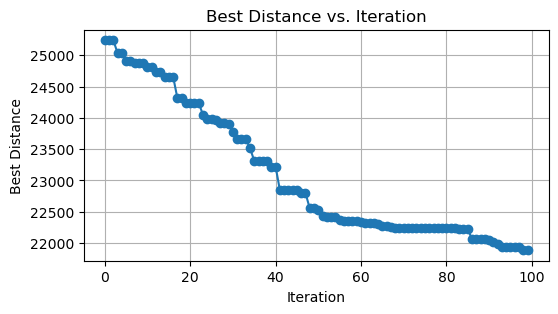

In [146]:
# to plot the graph as best distance against iterations
plt.figure(figsize=(6, 3)) 
plt.plot(range(iteration_limit), best_distances, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Best Distance')
plt.title('Best Distance vs. Iteration')
plt.grid(True)
plt.show()